**Camera Based 2D Feature Tracking (Mid-Term)**

*Saminda Abeyruwan*

We present herewith the analysis of the time it takes for keypoint detection and descriptor extraction.

Our dataset is available in *stats_output.csv* file. We have used HARRIS, FAST, BRISK, ORB, AKAZE, and SIFT detectors
and BRIEF, ORB, FREAK, AKAZE and SIFT descriptors. The matching configuration has been fixed. We have used the BF 
approach with the descriptor distance ratio set to 0.8.

We were not able to produce results for SIFT x BRIEF detector and descriptor combination.  

In [1]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("stats_output.csv")

The following graphs shows the detector time in ms vs detectors aggregated across the dataset. The top three
detectors are (based on median):

1. FAST
2. ORB
3. HARRIS

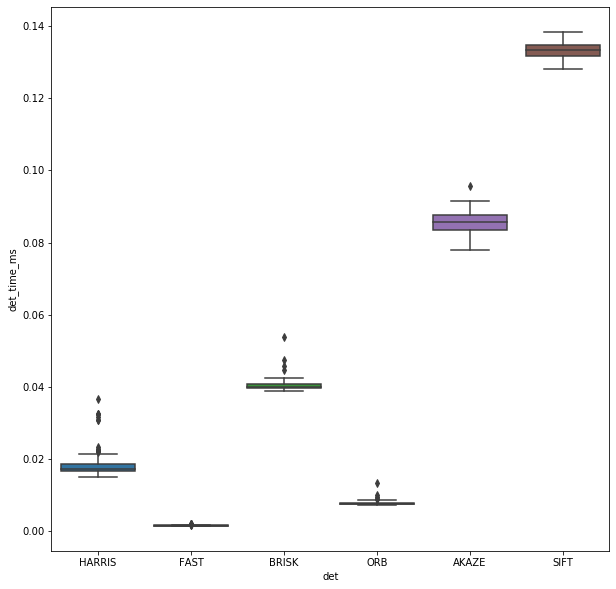

In [9]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="det", y="det_time_ms", data=df)

The following graphs shows the descriptor time in ms vs descriptor aggregated across the dataset. The top three
descriptor are (based on median):

1. FREAK
2. ORB
3. AKAZE

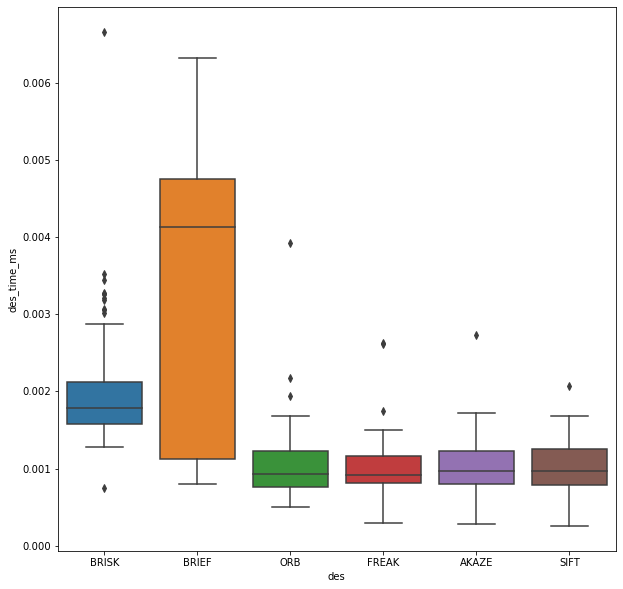

In [10]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="des", y="des_time_ms", data=df)

In [5]:
df["det_des"] = df["det"] + "_x_" + df["des"]
df["det_des_time_ms"] = df.eval("det_time_ms+des_time_ms")


Finally, we compare the total time in ms vs detectors cross descriptor combinations. As shown in the following figure,
all FAST detectors cross descriptor combinations outperform all the other combinations. According to our results, the
best peforming detector and descriptor combinations are (based on median):

1. FAST x FREAK
2. FAST x ORB
3. FAST x AKAZE

It is to be noted that we set *nfeatures=500* for ORB.

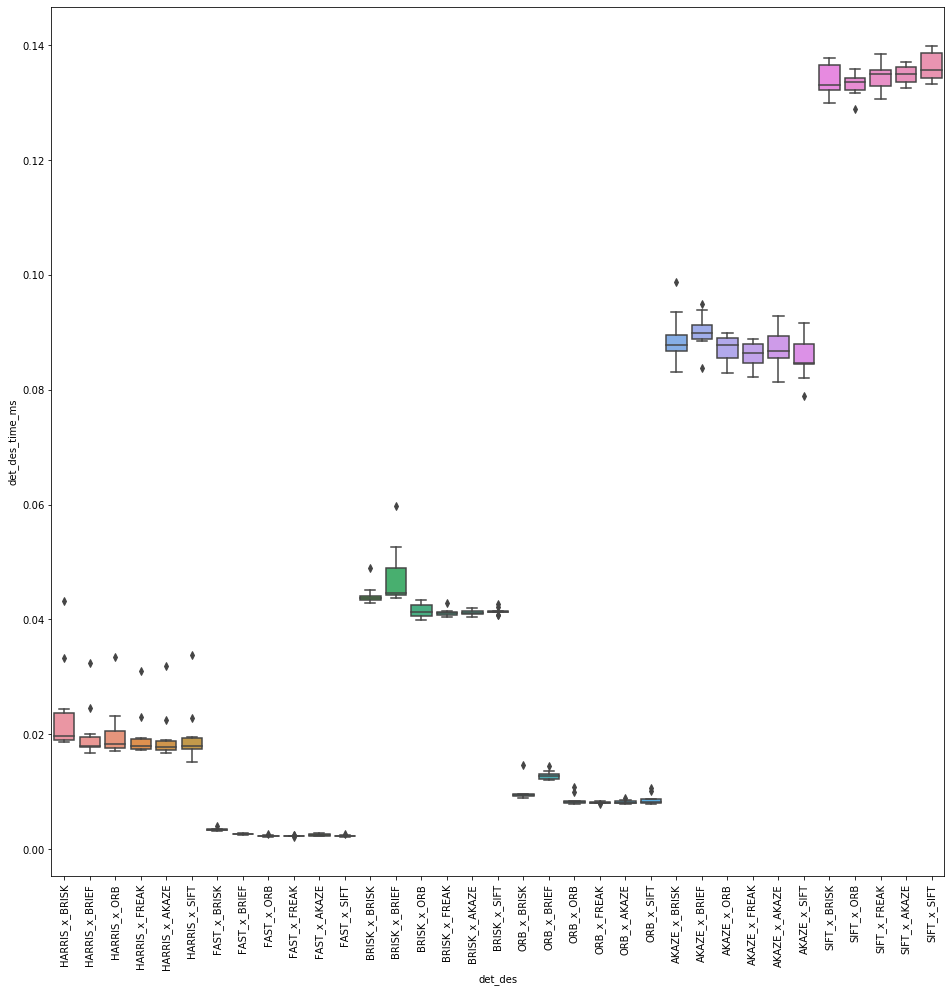

In [6]:
plt.figure(figsize=(16, 16))
ax = sns.boxplot(x="det_des", y="det_des_time_ms", data=df);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


Following figure shows the number of keypoints detected per image.

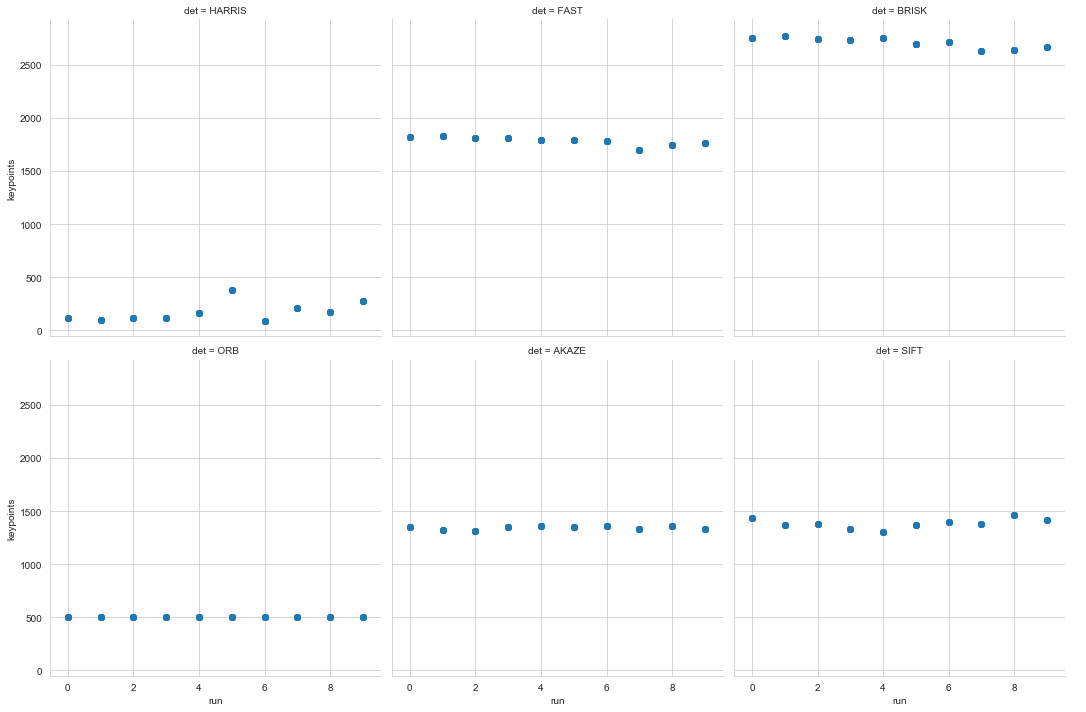

In [15]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df, col="det", col_wrap=3, height=5)
g.map(plt.scatter, "run", "keypoints", alpha=.7)
g.add_legend();


Following figure shows the mean and standard deviation of the neighborhood sizes.

<Figure size 720x720 with 0 Axes>

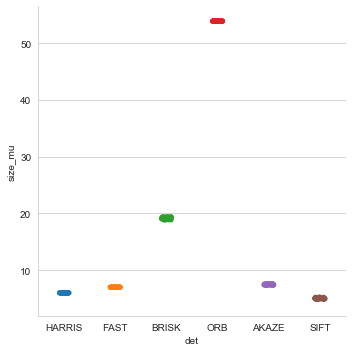

In [17]:
plt.figure(figsize=(10, 10))
sns.catplot(x="det", y="size_mu", data=df);

<Figure size 720x720 with 0 Axes>

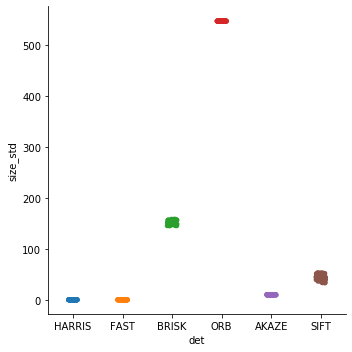

In [5]:
plt.figure(figsize=(10, 10))
sns.catplot(x="det", y="size_std", data=df);